## Q1) Prepare a classification model using SVM for salary data 

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('SalaryData_Train.csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(30161, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# Checking for the duplicate rows
data.duplicated().sum()

3258

In [6]:
# Dropping the duplicate rows
data= data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# No of rows and columns 
data.shape

(26903, 14)

In [8]:
#Describing the data
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Converting categorical to Numeric
le = LabelEncoder()
data['salary_num'] = le.fit_transform(data['Salary'])
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [10]:
#Checking the correlation between the features
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,salary_num
age,1.000000,0.038048,0.077235,0.052684,0.072529,0.223502
educationno,0.038048,1.000000,0.126085,0.080025,0.145491,0.332178
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403,0.228865
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093,0.153287
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000,0.225812
salary_num,0.223502,0.332178,0.228865,0.153287,0.225812,1.000000


In [11]:
#Salary_num Correlation W.R.T all other features
data.corr()['salary_num']

age             0.223502
educationno     0.332178
capitalgain     0.228865
capitalloss     0.153287
hoursperweek    0.225812
salary_num      1.000000
Name: salary_num, dtype: float64

In [12]:
# Checking whether education and educationno columns are same or not 
data1 = data.copy()
data1['edu_merge'] = data['education'] + ' = ' + (data['educationno'].astype(str))
data1['edu_merge'].head()
data1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num,edu_merge
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,Bachelors = 13
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Bachelors = 13
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,HS-grad = 9
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,11th = 7
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Bachelors = 13


In [13]:
#Checking unique values in the column
data1['edu_merge'].unique()

array([' Bachelors = 13', ' HS-grad = 9', ' 11th = 7', ' Masters = 14',
       ' 9th = 5', ' Some-college = 10', ' Assoc-acdm = 12',
       ' 7th-8th = 4', ' Doctorate = 16', ' Assoc-voc = 11',
       ' Prof-school = 15', ' 5th-6th = 3', ' 10th = 6', ' Preschool = 1',
       ' 12th = 8', ' 1st-4th = 2'], dtype=object)

### we can drop education column as it is a numerical representation of column educationno

In [14]:
#Dropping education column
data = data.drop(['education'],axis=1)
data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


Text(0.5, 1, 'pair plots to understand correlation')

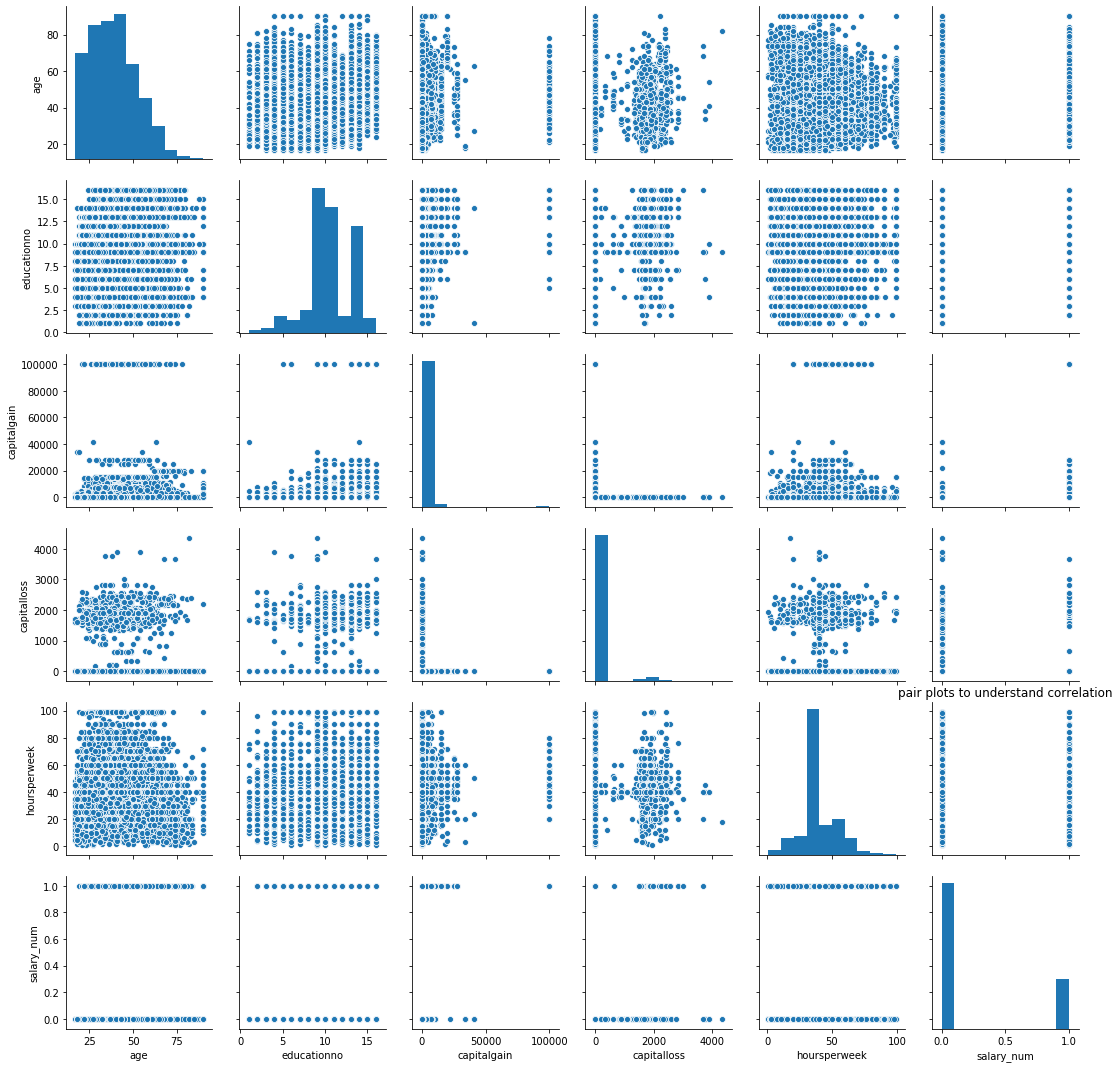

In [15]:
#plotting features
sns.pairplot(data)
plt.title('pair plots to understand correlation')

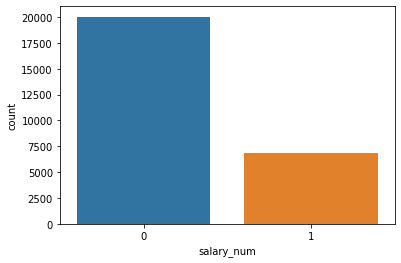

In [16]:
sns.countplot(data['salary_num'])

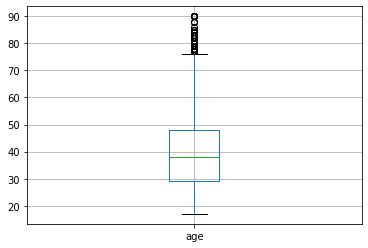

<Figure size 432x288 with 0 Axes>

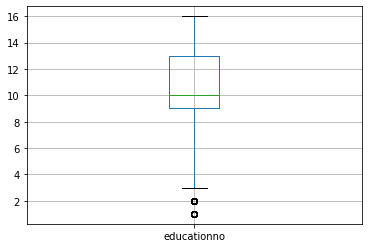

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

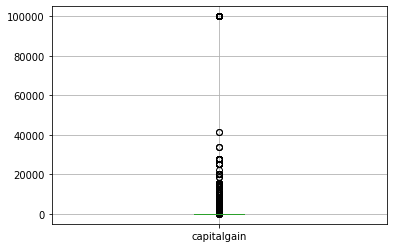

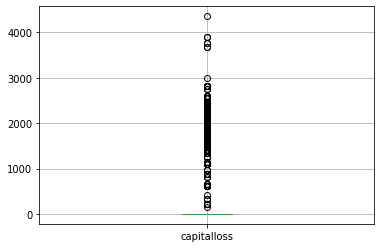

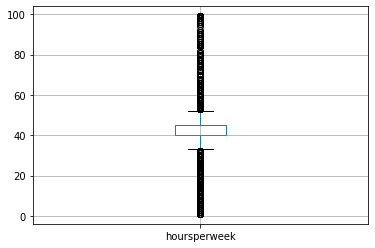

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
# Boxplots of all features
for column in data:
    plt.figure()
    if data[column].dtype == 'int64':
        data.boxplot([column])

In [18]:
#Transformation

mmscaler = MinMaxScaler()
cols = ['age', 'educationno', 'capitalgain','capitalloss']
data[cols] = mmscaler.fit_transform(data[cols])
data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,0.301370,State-gov,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,40,United-States,<=50K,0
1,0.452055,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,13,United-States,<=50K,0
2,0.287671,Private,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,40,United-States,<=50K,0
3,0.493151,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,40,United-States,<=50K,0
4,0.150685,Private,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,40,Cuba,<=50K,0


In [19]:
#Converting all categorical columns to numeric
#data_final= pd.get_dummies(data, drop_first= True)
#data_final.head()

In [20]:
# Converting all categorical columns to numeric using label encoder
le = LabelEncoder()
cols = ['workclass','maritalstatus', 'occupation', 'relationship', 'race', 'sex','hoursperweek', 'native']
for i in cols:
    data[i] = le.fit_transform(data[i])
data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,0.301370,5,0.800000,4,0,1,4,1,0.02174,0.0,39,37,<=50K,0
1,0.452055,4,0.800000,2,3,0,4,1,0.00000,0.0,12,37,<=50K,0
2,0.287671,2,0.533333,0,5,1,4,1,0.00000,0.0,39,37,<=50K,0
3,0.493151,2,0.400000,2,5,0,2,1,0.00000,0.0,39,37,<=50K,0
4,0.150685,2,0.800000,2,9,5,2,0,0.00000,0.0,39,4,<=50K,0


In [21]:
#Creating a copy of data
data_final = data.copy()

In [22]:
#Splitting data
X = data_final.drop(['Salary','salary_num'],axis=1)
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,5,0.800000,4,0,1,4,1,0.02174,0.0,39,37
1,0.452055,4,0.800000,2,3,0,4,1,0.00000,0.0,12,37
2,0.287671,2,0.533333,0,5,1,4,1,0.00000,0.0,39,37
3,0.493151,2,0.400000,2,5,0,2,1,0.00000,0.0,39,37
4,0.150685,2,0.800000,2,9,5,2,0,0.00000,0.0,39,4


In [23]:
y= data_final['salary_num']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary_num, dtype: int32

In [24]:
# Splitting data into X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

## SVC Algorithm

### Using Grid search CV

In [25]:
# Grid search CV to find better parameters based on SVC
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[0.5],'degree': [1],'C':[0.1] }] # Used rbc method and few values of C, degree and gamma as well. Have taken random values as it is taking long time to run
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1], 'degree': [1], 'gamma': [0.5],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
# As per grid sreach CV best parameters and score
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'degree': 1, 'gamma': 0.5, 'kernel': 'poly'}, 0.7959297463061054)

### Final SVC model

In [27]:
#Creating a final model with the best parameters
clf = SVC(C= 0.1, degree= 1, gamma= 0.5, kernel= 'poly')
clf.fit(X_train , y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predictions and model accuracy

In [28]:
#Predicting the values 
y_pred = clf.predict(X_test)
#Accuracy of model
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
# Confusion matrix
confusion_matrix(y_test, y_pred)

Accuracy = 79.61345474818808


array([[3872,  108],
       [ 989,  412]], dtype=int64)

## Testing the model/ prediction using test data

In [29]:
#importing amd reading test data
test_data = pd.read_csv('SalaryData_Test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [30]:
#Cleaning test data
test_data = test_data.drop(['education'], axis=1)
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [31]:
#Transformation
mmscaler = MinMaxScaler()
cols = ['age', 'educationno', 'capitalgain','capitalloss']
test_data[cols] = mmscaler.fit_transform(test_data[cols])
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,Private,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K
1,0.287671,Private,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
2,0.150685,Local-gov,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K
3,0.369863,Private,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,40,United-States,>50K
4,0.232877,Private,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,30,United-States,<=50K


In [32]:
# Converting all categorical columns to numeric using label encoder
le = LabelEncoder()
cols = ['workclass','maritalstatus', 'occupation', 'relationship', 'race', 'sex','hoursperweek', 'native']
for i in cols:
    test_data[i] = le.fit_transform(test_data[i])
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,2,0.400000,4,6,3,2,1,0.000000,0.0,39,37,<=50K
1,0.287671,2,0.533333,2,4,0,4,1,0.000000,0.0,49,37,<=50K
2,0.150685,1,0.733333,2,10,0,4,1,0.000000,0.0,39,37,>50K
3,0.369863,2,0.600000,2,6,0,2,1,0.076881,0.0,39,37,>50K
4,0.232877,2,0.333333,4,7,1,4,1,0.000000,0.0,29,37,<=50K


In [33]:
#Removing the duplicates
test_data = test_data.drop_duplicates()
test_data.reset_index(drop=True, inplace=True)
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,2,0.400000,4,6,3,2,1,0.000000,0.0,39,37,<=50K
1,0.287671,2,0.533333,2,4,0,4,1,0.000000,0.0,49,37,<=50K
2,0.150685,1,0.733333,2,10,0,4,1,0.000000,0.0,39,37,>50K
3,0.369863,2,0.600000,2,6,0,2,1,0.076881,0.0,39,37,>50K
4,0.232877,2,0.333333,4,7,1,4,1,0.000000,0.0,29,37,<=50K


In [34]:
#Splitting data
X_test_new = test_data.iloc[:,:-1]
X_test_new.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,2,0.400000,4,6,3,2,1,0.000000,0.0,39,37
1,0.287671,2,0.533333,2,4,0,4,1,0.000000,0.0,49,37
2,0.150685,1,0.733333,2,10,0,4,1,0.000000,0.0,39,37
3,0.369863,2,0.600000,2,6,0,2,1,0.076881,0.0,39,37
4,0.232877,2,0.333333,4,7,1,4,1,0.000000,0.0,29,37


In [35]:
#Predictions
y_pred_test = clf.predict(X_test_new)

In [36]:
#Predicted values
pd.DataFrame(y_pred_test)

,0
0,0
1,0
2,0
3,0
4,0
...,...
14125,0
14126,0
14127,0
14128,0


In [39]:
#Converting categorical to Numeric
le = LabelEncoder()
test_data['salary_num'] = le.fit_transform(test_data['Salary'])
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,0.109589,2,0.400000,4,6,3,2,1,0.000000,0.0,39,37,<=50K,0
1,0.287671,2,0.533333,2,4,0,4,1,0.000000,0.0,49,37,<=50K,0
2,0.150685,1,0.733333,2,10,0,4,1,0.000000,0.0,39,37,>50K,1
3,0.369863,2,0.600000,2,6,0,2,1,0.076881,0.0,39,37,>50K,1
4,0.232877,2,0.333333,4,7,1,4,1,0.000000,0.0,29,37,<=50K,0


In [40]:
#Accuracy of predicions
acc = accuracy_score(test_data['salary_num'], y_pred_test) * 100
print("Accuracy =", acc)
# Confusion matrix
confusion_matrix(test_data['salary_num'], y_pred_test)

Accuracy = 80.02123142250531


array([[10301,   319],
       [ 2504,  1006]], dtype=int64)